#Natural Language Processing


## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.stem import PorterStemmer
# import pdb
from nltk.corpus import stopwords, twitter_samples
import nltk
import string
from nltk.tokenize import TweetTokenizer
# from os import getcwd
# import w2_unittest


nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Importing the dataset

In [ ]:
# get the sets of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# split the data into two pieces, one for training and one for testing (validation set)
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

# avoid assumptions about the length of all_positive_tweets
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

#Part 1: Process the Data


In [ ]:
import re
def process_tweet(tweet):
  """Process tweet function.
  Input:
      tweet: a string containing a tweet
  Output:
      tweets_clean: a list of words containing the processed tweet

  """
  stemmer = PorterStemmer()
  stopwords_english = stopwords.words('english')
  tweet = str(tweet)
  # remove stock market tickers like $GE
  tweet = re.sub(r'\$\w*', '', tweet)
  # remove old style retweet text "RT"
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  # remove hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  # remove hashtags
  # only removing the hash # sign from the word
  tweet = re.sub(r'#', '', tweet)
  # tokenize tweets

  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                            reduce_len=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweets_clean = []
  for word in tweet_tokens:
      if (word not in stopwords_english and  # remove stopwords
              word not in string.punctuation):  # remove punctuation
          # tweets_clean.append(word)
          stem_word = stemmer.stem(word)  # stemming word
          tweets_clean.append(stem_word)
  return tweets_clean


In [ ]:
custom_tweet = ["RT @Twitter @chapagain Hello There! Have a great day. :) #good #morning http://chapagain.com.np","RT @Twitter @chapagain Hello There! Have a great day. :) #good #morning http://chapagain.com.np"]

# print cleaned tweet
print(process_tweet(custom_tweet))

['rt', 'hello', 'great', 'day', ':)', 'good', 'morn']


In [ ]:
def count_tweets(result, tweets, ys):
    '''
    Input:
        result: a dictionary that will be used to map each pair to its frequency
        tweets: a list of tweets
        ys: a list corresponding to the sentiment of each tweet (either 0 or 1)
    Output:
        result: a dictionary mapping each pair to its frequency
    '''
    for y, tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            # define the key, which is the word and label tuple
            pair = (word,y)

            # if the key exists in the dictionary, increment the count
            if pair in result:
                result[pair] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[pair] = 1

    return result

In [ ]:
# Testing your function

result = {}
tweets = ['i am happy', 'i am tricked', 'i am sad', 'i am tired', 'i am tired']
ys = [1, 0, 0, 0, 0]
count_tweets(result, tweets, ys)

{('happi', 1): 1, ('trick', 0): 1, ('sad', 0): 1, ('tire', 0): 2}

##Frequence Counting for each word in the tweet

In [ ]:
# Build the freqs dictionary for later uses
freqs = count_tweets({}, train_x, train_y)

In [ ]:
len (train_y[train_y == 0])

4000

#Part 2: Train your model using Naive Bayes

In [ ]:
l = [key[0] for key in freqs.keys()]
for key in freqs.keys():
  print(key)
print(l)
print(set(l))
print (len (l) , len (set(l)))

Streaming output truncated to the last 5000 lines.
('weather', 0.0)
('us', 0.0)
('could', 0.0)
('walao', 0.0)
('kb', 0.0)
('send', 0.0)
('ill', 0.0)
('djderek', 0.0)
('mani', 0.0)
('fun', 0.0)
('gig', 0.0)
('absolut', 0.0)
('legend', 0.0)
('wait', 0.0)
('till', 0.0)
('saturday', 0.0)
('homework', 0.0)
('pa', 0.0)
('made', 0.0)
('da', 0.0)
('greek', 0.0)
('tragedi', 0.0)
('rain', 0.0)
('gym', 0.0)
('💪🏻', 0.0)
('🐒', 0.0)
('what', 0.0)
('wrong', 0.0)
('struck', 0.0)
('anymor', 0.0)
('belgium', 0.0)
('fabian', 0.0)
('delph', 0.0)
('fallen', 0.0)
('hide', 0.0)
('drake', 0.0)
('silent', 0.0)
('hear', 0.0)
('rest', 0.0)
('peac', 0.0)
('mo', 0.0)
('tonight', 0.0)
('t20blast', 0.0)
('ahhh', 0.0)
('wake', 0.0)
('mumma', 0.0)
('7', 0.0)
('dead', 0.0)
('tomorrow', 0.0)
("i'll", 0.0)
('high', 0.0)
('low', 0.0)
('pray', 0.0)
('appropri', 0.0)
('. . .', 0.0)
('awak', 0.0)
('woke', 0.0)
('upp', 0.0)
('dm', 0.0)
('luke', 0.0)
('hey', 0.0)
('babe', 0.0)
('across', 0.0)
('hindi', 0.0)
('reaction', 0.0)
(

In [ ]:
def freq_pos_count(word, freqs):
  p_value = None
  for key, value in freqs.items():
    if word == key[0] and key[1] == 1.0:
      p_value =  value
      break
  if p_value == None:
    return 0
  return p_value

def freq_neg_count(word, freqs):
  n_value = None
  for key, value in freqs.items():
    if word == key[0] and key[1] == 0.0:
      n_value = value
      break
  if n_value == None:
    return 0
  return n_value

Score



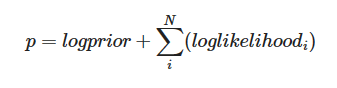


Loglikelihood

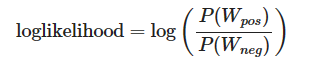



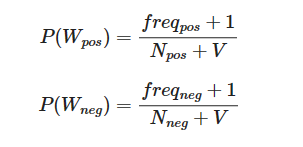



Logprior



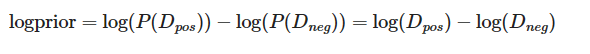


In [ ]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of tweets
        train_y: a list of labels correponding to the tweets (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''

    loglikelihood = {}
    logprior = 0


    # calculate V, the number of unique words in the vocabulary
    vocab = set([key[0] for key in freqs.keys()])
    V = len(vocab)

    # calculate N_pos, N_neg, V_pos, V_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:

            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += freqs[pair]

        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            N_neg += freqs[pair]

    # Calculate D, the number of documents
    D = len(train_x)

    # Calculate D_pos, the number of positive documents
    D_pos = len (train_y[train_y == 1])

    # Calculate D_neg, the number of negative documents
    D_neg = len (train_y[train_y == 0])

    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = freq_pos_count(word, freqs)
        freq_neg = freq_neg_count(word, freqs)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos+1)/(N_pos+V)
        p_w_neg = (freq_neg+1)/(N_neg+V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos) - np.log(p_w_neg)


    return logprior, loglikelihood


In [ ]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)


print(logprior)
print(len(loglikelihood))
print(loglikelihood)

0.0
9085
{'chiquito': 0.6982557485026692, 'km': -0.40035654016544164, 'friex': -0.6880386126172215, 'togeth': 0.005108567942723852, 'stomachach': -0.6880386126172215, 'pabeb': -1.093503720725387, 'liverpool': -1.093503720725387, '90210': 0.6982557485026692, 'popular': 0.005108567942723852, 'goddamn': -0.6880386126172215, '10th': -0.6880386126172215, 'getthescoop': -0.6880386126172215, 'mode': -1.093503720725387, 'vuli': 0.6982557485026692, 'b-but': -0.6880386126172215, 'women': -0.9111821639314321, 'anymor': -1.4989688288335508, 'messag': 0.11046908360054886, 'earlob': -0.6880386126172215, 'eyyah': -0.6880386126172215, 'kresna': 0.6982557485026692, 'rbi': -0.6880386126172215, 'sparki': 0.6982557485026692, 'skulker': -0.6880386126172215, 'helium': -0.6880386126172215, 'dorset': 0.6982557485026692, 'sky': 1.103720856610833, 'burn': -0.5057170558232684, 'jelli': 0.6982557485026692, 'threw': 0.005108567942723852, 'raha': -0.6880386126172215, 'pig': -0.40035654016544164, 'gut': -2.392786704

#Part 3: Test your naive bayes


In [ ]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    Input:
        tweet: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)

    '''
    # process the tweet to get a list of words
    word_l = process_tweet(tweet)

    # initialize probability to zero
    p = 0

    # add the logprior
    p += logprior

    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood[word]


    return p

In [ ]:
# Experiment with your own tweet.
my_tweet = 'She smiled.'
p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 1.5737244858565678


In [ ]:
# UNQ_C6 GRADED FUNCTION: test_naive_bayes

def test_naive_bayes(test_x, test_y, logprior, loglikelihood, naive_bayes_predict=naive_bayes_predict):
    """
    Input:
        test_x: A list of tweets
        test_y: the corresponding labels for the list of tweets
        logprior: the logprior
        loglikelihood: a dictionary with the loglikelihoods for each word
    Output:
        accuracy: (# of tweets classified correctly)/(total # of tweets)
    """
    accuracy = 0  # return this properly

    y_hats = []
    for tweet in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)

    return y_hats




In [ ]:

from sklearn.metrics import accuracy_score
accuracy_score(test_y, test_naive_bayes(test_x, test_y, logprior, loglikelihood))

0.994

In [ ]:
# Run this cell to test your function
for tweet in ['Iam so sad','I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    p = naive_bayes_predict(tweet, logprior, loglikelihood)
    print(f'{tweet} -> {p:.2f}')

Iam so sad -> -3.91
I am happy -> 2.15
I am bad -> -1.29
this movie should have been great. -> 2.14
great -> 2.14
great great -> 4.28
great great great -> 6.41
great great great great -> 8.55


#Part 4: Predict with your own tweet


In [ ]:
# Test with your own tweet - feel free to modify `my_tweet`
my_tweet = 'Even though there are so many workshops in this world, why did I participate in this workshop?'

p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
if p > 0:
    print('Positive sentiment')
else:
    print('Negative sentiment')

Positive sentiment
